In [1]:
# pip install matplotlib-venn

In [2]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

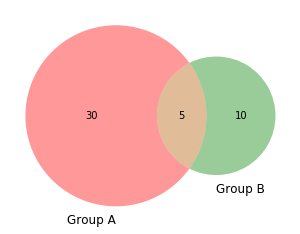

In [3]:
venn2(subsets = (30, 10, 5), set_labels = ('Group A', 'Group B'))

In [4]:
import re
import pandas as pd
import numpy as np
import os
import seaborn as sns
import h5py
import scipy.stats
import random
from matplotlib.pyplot import *
from statsmodels.nonparametric import smoothers_lowess
import statsmodels.stats.multitest
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import glob
import matplotlib_venn


sns.set_style("ticks")
rcParams['svg.fonttype'] = 'none'
%matplotlib inline

In [5]:
diff_df = pd.read_csv('/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.diff_efficiency_by_cell_line.tsv',
                     sep='\t')
neuroseq_donor_set = set(diff_df['donor_id'].tolist())

print(len(neuroseq_donor_set))

199


In [ ]:
#t_file = '/nfs/leia/research/stegle/dseaton/hipsci/proteomics_analysis/data/analysis/IPSc.ISR.featureCounts.genes.counts.unique.stranded.tsv_counts.HQ_TMM_TPM.tsv.gz'
t_file = '/hps/nobackup/hipsci/scratch/trans_eqtls/IPS_Bulk-RNA_Processing/Merged/IPS_Bulk-RNA_Processing/FullFreeze_Corrected_iPSC_20180506.txt.gz'

t_df = pd.read_csv(t_file,
                  sep='\t', index_col=0)

t_df.columns = [x.replace('i.','i-').replace('.hs37d5','') for x in t_df.columns]

t_df = t_df.loc[:, [x.startswith('HPSI') for x in t_df.columns]]
t_df = t_df[t_df.mean(axis=1)>2.0]

print(t_df.shape)

bulk_donor_set = set(t_df.columns)
print(len(bulk_donor_set))

t_df.head()

In [ ]:
sc_metadata_file = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/sce_merged_afterqc_filt_allexpts_metadata_20180618.tsv'

sc_df = pd.read_csv(sc_metadata_file, sep='\t')

sc_df = sc_df.query('day=="day0"')

sc_donor_set = set(sc_df['donor_long_id'].drop_duplicates().tolist())

print(len(sc_donor_set))

sc_df.head()

In [ ]:
set_labels = ['Neural diff. \nscRNA-seq\n(this study)',
              'iPSC bulk \nRNA-seq\n(Kilpinen \net al, 2017)',
              'iPSC scRNA-seq\n(Cuomo et al, 2020)'
              ]

fig = figure(figsize=(6,3))
matplotlib_venn.venn3([neuroseq_donor_set, bulk_donor_set,sc_donor_set],
                     set_labels = set_labels)


In [ ]:
matplotlib_venn.venn3([neuroseq_donor_set, bulk_donor_set,sc_donor_set],
                     set_labels = set_labels, set_colors=('darkred','firebrick','coral'), alpha = 0.5)

In [ ]:
set_labels = ['',
              '',
              ''
              ]
v = matplotlib_venn.venn3([neuroseq_donor_set, bulk_donor_set,sc_donor_set],
                     set_labels = set_labels, set_colors=('darkred','firebrick','coral'), alpha = 0.5)
v.get_label_by_id('100').set_text('')
v.get_label_by_id('001').set_text('')

In [ ]:
set_labels = ['',
              '',
              ''
              ]
v = matplotlib_venn.venn3([neuroseq_donor_set, bulk_donor_set,sc_donor_set],
                     set_labels = set_labels, set_colors=('white','lightgrey','black'), alpha = 0.8)
v.get_label_by_id('100').set_text('')
v.get_label_by_id('001').set_text('')
c=venn3_circles([neuroseq_donor_set, bulk_donor_set,sc_donor_set], linewidth=1)
c[0].set_lw(5)
# c[0].set_ls('dotted')
# c[0].set_color('skyblue')
plt.show()

In [ ]:
from matplotlib_venn import *
from matplotlib import pyplot as plt
v = venn2(subsets = {'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'))
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('10').set_color('orange')
v.get_patch_by_id('01').set_alpha(0.5)
v.get_patch_by_id('01').set_color('orange')
v.get_patch_by_id('11').set_alpha(0.75)
v.get_patch_by_id('11').set_color('orange')
v.get_label_by_id('10').set_text('')
v.get_label_by_id('01').set_text('')
v.get_label_by_id('11').set_text('')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
v.get_label_by_id('A').set_size(20)
v.get_label_by_id('B').set_size(20)
plt.annotate('Event A', xy = v.get_label_by_id('10').get_position(), xytext = (-30,-70), size = 'xx-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad=0.5', fc = 'lime', alpha = 0.3),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0.5', color = 'gray'))

plt.annotate('Event B', xy = v.get_label_by_id('01').get_position(), xytext = (30,-70), size = 'xx-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'lime', alpha = 0.3),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad = -0.5',color = 'gray'))

plt.show()